Ques: 1 A Hamming code allows for a 4 bit code to be encoded as 7 bits, with the advantage that if 0 or 1 bit(s) are corrupted, then the message can be perfectly reconstructed. You are working on a system where the probability of any bit being lost is 0.1. How does reliability change when using a Hamming code? Plot the probability of using error-correcting codes and the probability
of without using error-correcting codes.

<BarContainer object of 2 artists>

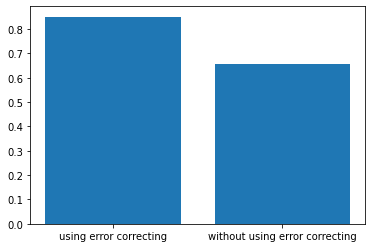

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import random

def bin(n,k,p):
    p =math.comb(n,k)*(p**k)*((1-p)**(n-k))
    return p
w_o= bin(4,0,0.1)
w=bin(7,0,0.1)+bin(7,1,0.1)
data={'using error correcting':w,'without using error correcting':w_o}
name=list(data.keys())
value=list(data.values())
plt.bar(name,value)

2. Let X1, X2, . . . , X100, be independent and uniformly distributed random variables over [0, 1] and
Y =
P100
i=1 Xi
. Generate the probability
density function (PDF) of Y .

In [2]:
# importing module
import numpy as np


# numpy.random.uniform() method
x = np.random.uniform(0.0, 1.0, 100)
sum = 0;         
#Loop for calculating the sum of all xi for i=1 to 100   
for i in range(0, len(x)):    
   sum = sum + x[i];    
print("Sum of all the elements of an array: " + str(sum))

Sum of all the elements of an array: 46.56272411567222


3. The autocorrelation sequence of a random process can be estimated
from a finite number of samples, e.g. x(n) for n = 0, 1, . . . , N − 1. The autocorrelation may be estimated using the sample autocorrelation as
rˆx(k) = 1
N
N
X−1
n=0
x(n)x
∗
(n − k) (2)
Since x(n) is only given for values of n within the interval [0, N − 1], in evaluating this sum, x(n) is assumed to be equal to zero for values of n that are outside the interval [0, N − 1]. With x(n) = 1 for n = 0, 1, . . . , 7; plot the input sequence and the sample autocorrelation sequence ˆrx (each must be on a subplot).


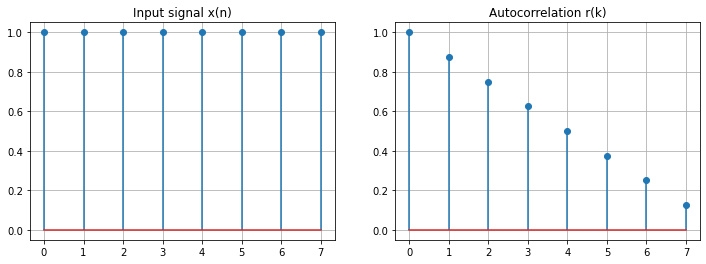

In [6]:
import matplotlib.pyplot as plt
def autocorr(x):
    N = len(x)
    r = np.zeros(N)
    for k in range(N):
        for i in range(N):
            if(i-k<0):
                r[k] += 0
            else:
                r[k] += (x[i]*x[i-k])/N
    return r

n = [i for i in range(8)]
x = [1 for i in range(8)]
r = autocorr(x)
 
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].stem(n,x)
axes[0].set_title("Input signal x(n)")
axes[0].grid()

axes[1].stem(n,r)
axes[1].set_title("Autocorrelation r(k)")
axes[1].grid()


4. (a) Generate N samples of zero mean with unit variance white Gaussian noise. Plot the histogram.


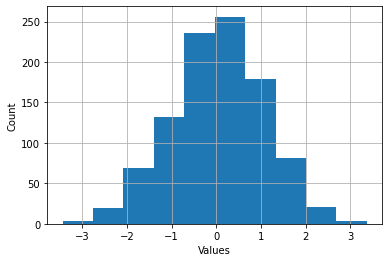

In [3]:
import matplotlib.pyplot as plt
import numpy as np
N=1000
data = np.random.normal(0,1,1000)
plt.figure(figsize=(6,4))
plt.hist(data)
plt.xlabel("Values")
plt.ylabel("Count")
plt.grid()

(b) Estimate the first M lags of the autocorrelation sequence using the sample autocorrelation as
rˆx(k) = 1
N
N
X−1
n=0
x(n)x(n − k) (3)
Determine that how close is your estimate to the true autocorrelation sequence rx(k) = δ(k)?


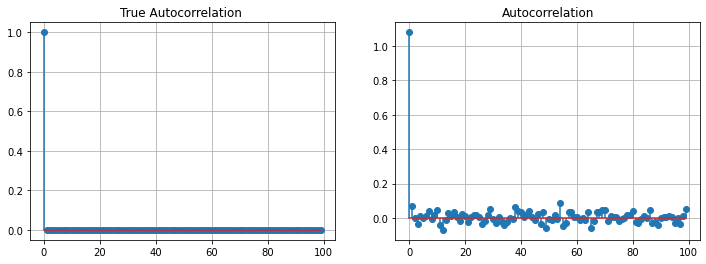

In [7]:
m=100
t = [1] + [0 for i in range(m-1)]
n = np.arange(0,100,1)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].stem(n,t)
axes[0].set_title("True Autocorrelation ")
axes[0].grid()

a=autocorr(data)[0:100]
axes[1].stem(n,a)
axes[1].set_title("Autocorrelation")
axes[1].grid()


Ques:5 Define two custom functions (one for correlation and other for covariance), where each function takes two features as input and returns the correlation or covariance between the features as output. Use these functions to calculate the correlation and covariance between every possible pair of features in the dataset and display the result in the form of table (You are not allowed to use any inbuilt functions). Compare your function results with the inbuilt functions and tabulate them.

In [8]:
df = pd.read_csv('Seed_Data.csv')
df = df.drop(['target'], axis=1) 
df

,A,P,C,LK,WK,A_Coef,LKG
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044


In [9]:
def correlation_coefficient(x,y):
    x1=[]
    y1=[]
    num=0
    den1=0
    den2=0
    mean_x=(np.sum(x))/(len(x))
    mean_y=(np.sum(y))/(len(y))
    
    for i in x:
        x1.append(i-mean_x)
    
   
    for j in y:
        y1.append(j-mean_y)
    
   
    for k in range(len(x1)):
        
        num=num+(x1[k]*y1[k])
        den1=den1+((x1[k])**2)
        den2=den2+((y1[k])**2)
    
    return num/np.sqrt(den1*den2)

In [10]:
def covariance(x,y):
    
    x1=[]
    y1=[]
    num=0
    mean_x=(np.sum(x))/(len(x))
    mean_y=(np.sum(y))/(len(y))
    
    for i in x:
        x1.append(i-mean_x)
    
   
    for j in y:
        y1.append(j-mean_y)
    
    for k in range(len(x1)):
        num=num+(x1[k]*y1[k])
        
    return num/(len(x1)-1)

In [11]:
A = df['A'].to_list()
P = df['P'].to_list()
C = df['C'].to_list()
LK = df['LK'].to_list()
WK = df['WK'].to_list()
A_Coef = df['A_Coef'].to_list()
LKG = df['LKG'].to_list()
S = [A,P,C,LK,WK,A_Coef,LKG]

In [13]:
# for A
cor_coff_A = []
cov_A = []
std_cor_coff_A = []
std_cov_A = []
for i in range(len(S)):
        cor_coff_A.append(correlation_coefficient(S[0],S[i]))
        cov_A.append(covariance(S[0],S[i]))
        std_cor_coff_A.append(np.corrcoef(S[0],S[i])[0][1])
        std_cov_A.append(np.cov(S[0],S[i])[0][1])

In [14]:
Column = ['A and A', 'A and P','A and C', 'A and LK','A and WK', 'A and A_Coef','A and LKG']
Data_A = {'Column':Column,'Correlation Coefficient':cor_coff_A,'Covariance':cov_A,
          'Std Correlation Coefficient':std_cor_coff_A,'Std Covariance':std_cov_A}
D_A = pd.DataFrame(Data_A)
D_A

,Column,Correlation Coefficient,Covariance,Std Correlation Coefficient,Std Covariance
0,A and A,1.000000,8.466351,1.000000,8.466351
1,A and P,0.994341,3.778443,0.994341,3.778443
2,A and C,0.608288,0.041823,0.608288,0.041823
3,A and LK,0.949985,1.224704,0.949985,1.224704
4,A and WK,0.970771,1.066911,0.970771,1.066911
5,A and A_Coef,-0.229572,-1.004356,-0.229572,-1.004356
6,A and LKG,0.863693,1.235133,0.863693,1.235133


In [15]:
# for P
cor_coff_P = []
cov_P = []
std_cor_coff_P = []
std_cov_P = []
for i in range(len(S)):
        cor_coff_P.append(correlation_coefficient(S[1],S[i]))
        cov_P.append(covariance(S[1],S[i]))
        std_cor_coff_P.append(np.corrcoef(S[1],S[i])[0][1])
        std_cov_P.append(np.cov(S[1],S[i])[0][1])

In [16]:
Column = ['P and A', 'P and P','P and C', 'P and LK','P and WK', 'P and A_Coef','P and LKG']
Data_P = {'Column':Column,'Correlation Coefficient':cor_coff_P,'Covariance':cov_P,
          'Std Correlation Coefficient':std_cor_coff_P,'Std Covariance':std_cov_P}
D_P = pd.DataFrame(Data_P)
D_P


,Column,Correlation Coefficient,Covariance,Std Correlation Coefficient,Std Covariance
0,P and A,0.994341,3.778443,0.994341,3.778443
1,P and P,1.000000,1.705528,1.000000,1.705528
2,P and C,0.529244,0.016332,0.529244,0.016332
3,P and LK,0.972422,0.562666,0.972422,0.562666
4,P and WK,0.944829,0.466065,0.944829,0.466065
5,P and A_Coef,-0.217340,-0.426766,-0.217340,-0.426766
6,P and LKG,0.890784,0.571753,0.890784,0.571753


In [17]:
# for C
cor_coff_C= []
cov_C = []
std_cor_coff_C = []
std_cov_C = []
for i in range(len(S)):
        cor_coff_C.append(correlation_coefficient(S[2],S[i]))
        cov_C.append(covariance(S[2],S[i]))
        std_cor_coff_C.append(np.corrcoef(S[2],S[i])[0][1])
        std_cov_C.append(np.cov(S[2],S[i])[0][1])

In [18]:
Column = ['C and A', 'C and P','C and C', 'C and LK','C and WK', 'C and A_Coef','C and LKG']
Data_C = {'Column':Column,'Correlation Coefficient':cor_coff_C,'Covariance':cov_C,
          'Std Correlation Coefficient':std_cor_coff_C,'Std Covariance':std_cov_C}
D_C = pd.DataFrame(Data_C)
D_C

,Column,Correlation Coefficient,Covariance,Std Correlation Coefficient,Std Covariance
0,C and A,0.608288,0.041823,0.608288,0.041823
1,C and P,0.529244,0.016332,0.529244,0.016332
2,C and C,1.000000,0.000558,1.000000,0.000558
3,C and LK,0.367915,0.003852,0.367915,0.003852
4,C and WK,0.761635,0.006798,0.761635,0.006798
5,C and A_Coef,-0.331471,-0.011777,-0.331471,-0.011777
6,C and LKG,0.226825,0.002634,0.226825,0.002634


In [19]:
# for LK
cor_coff_LK = []
cov_LK = []
std_cor_coff_LK = []
std_cov_LK = []
for i in range(len(S)):
        cor_coff_LK.append(correlation_coefficient(S[3],S[i]))
        cov_LK.append(covariance(S[3],S[i]))
        std_cor_coff_LK.append(np.corrcoef(S[3],S[i])[0][1])
        std_cov_LK.append(np.cov(S[3],S[i])[0][1])

In [20]:
Column = ['LK and A', 'LK and P','LK and C', 'LK and LK','LK and WK', 'LK and A_Coef','LK and LKG']
Data_LK = {'Column':Column,'Correlation Coefficient':cor_coff_LK,'Covariance':cov_LK,
          'Std Correlation Coefficient':std_cor_coff_LK,'Std Covariance':std_cov_LK}
D_LK = pd.DataFrame(Data_LK)
D_LK

,Column,Correlation Coefficient,Covariance,Std Correlation Coefficient,Std Covariance
0,LK and A,0.949985,1.224704,0.949985,1.224704
1,LK and P,0.972422,0.562666,0.972422,0.562666
2,LK and C,0.367915,0.003852,0.367915,0.003852
3,LK and LK,1.000000,0.196305,1.000000,0.196305
4,LK and WK,0.860415,0.143992,0.860415,0.143992
5,LK and A_Coef,-0.171562,-0.114290,-0.171562,-0.114290
6,LK and LKG,0.932806,0.203125,0.932806,0.203125


In [21]:
# for WK
cor_coff_WK = []
cov_WK = []
std_cor_coff_WK = []
std_cov_WK = []
for i in range(len(S)):
        cor_coff_WK.append(correlation_coefficient(S[4],S[i]))
        cov_WK.append(covariance(S[4],S[i]))
        std_cor_coff_WK.append(np.corrcoef(S[4],S[i])[0][1])
        std_cov_WK.append(np.cov(S[4],S[i])[0][1])

In [22]:
Column = ['WK and A', 'WK and P','WK and C', 'WK and LK','WK and WK', 'WK and A_Coef','WK and LKG']
Data_WK = {'Column':Column,'Correlation Coefficient':cor_coff_WK,'Covariance':cov_WK,
          'Std Correlation Coefficient':std_cor_coff_WK,'Std Covariance':std_cov_WK}
D_WK = pd.DataFrame(Data_WK)
D_WK

,Column,Correlation Coefficient,Covariance,Std Correlation Coefficient,Std Covariance
0,WK and A,0.970771,1.066911,0.970771,1.066911
1,WK and P,0.944829,0.466065,0.944829,0.466065
2,WK and C,0.761635,0.006798,0.761635,0.006798
3,WK and LK,0.860415,0.143992,0.860415,0.143992
4,WK and WK,1.000000,0.142668,1.000000,0.142668
5,WK and A_Coef,-0.258037,-0.146543,-0.258037,-0.146543
6,WK and LKG,0.749131,0.139068,0.749131,0.139068


In [24]:
# for A_Coef
cor_coff_A_Coef = []
cov_A_Coef = []
std_cor_coff_A_Coef = []
std_cov_A_Coef = []
for i in range(len(S)):
        cor_coff_A_Coef.append(correlation_coefficient(S[5],S[i]))
        cov_A_Coef.append(covariance(S[5],S[i]))
        std_cor_coff_A_Coef.append(np.corrcoef(S[5],S[i])[0][1])
        std_cov_A_Coef.append(np.cov(S[5],S[i])[0][1])


In [25]:
Column = ['A_Coef and A', 'A_Coef and P','A_Coef and C', 'A_Coef and LK','A_Coef and WK', 
          'A_Coef and A_Coef','A_Coef and LKG']
Data_A_Coef = {'Column':Column,'Correlation Coefficient':cor_coff_A_Coef,'Covariance':cov_A_Coef,
          'Std Correlation Coefficient':std_cor_coff_A_Coef,'Std Covariance':std_cov_A_Coef}
D_A_Coef = pd.DataFrame(Data_A_Coef)
D_A_Coef

,Column,Correlation Coefficient,Covariance,Std Correlation Coefficient,Std Covariance
0,A_Coef and A,-0.229572,-1.004356,-0.229572,-1.004356
1,A_Coef and P,-0.217340,-0.426766,-0.217340,-0.426766
2,A_Coef and C,-0.331471,-0.011777,-0.331471,-0.011777
3,A_Coef and LK,-0.171562,-0.114290,-0.171562,-0.114290
4,A_Coef and WK,-0.258037,-0.146543,-0.258037,-0.146543
5,A_Coef and A_Coef,1.000000,2.260684,1.000000,2.260684
6,A_Coef and LKG,-0.011079,-0.008187,-0.011079,-0.008187


In [26]:
# for LKG
cor_coff_LKG = []
cov_LKG = []
std_cor_coff_LKG = []
std_cov_LKG = []
for i in range(len(S)):
        cor_coff_LKG.append(correlation_coefficient(S[6],S[i]))
        cov_LKG.append(covariance(S[6],S[i]))
        std_cor_coff_LKG.append(np.corrcoef(S[6],S[i])[0][1])
        std_cov_LKG.append(np.cov(S[6],S[i])[0][1])

In [27]:
Column = ['LKG and A', 'LKG and P','LKG and C', 'LKG and LK','LKG and WK', 'LKG and A_Coef','LKG and LKG']
Data_LKG = {'Column':Column,'Correlation Coefficient':cor_coff_LKG,'Covariance':cov_LKG,
          'Std Correlation Coefficient':std_cor_coff_LKG,'Std Covariance':std_cov_LKG}
D_LKG = pd.DataFrame(Data_LKG)
D_LKG

,Column,Correlation Coefficient,Covariance,Std Correlation Coefficient,Std Covariance
0,LKG and A,0.863693,1.235133,0.863693,1.235133
1,LKG and P,0.890784,0.571753,0.890784,0.571753
2,LKG and C,0.226825,0.002634,0.226825,0.002634
3,LKG and LK,0.932806,0.203125,0.932806,0.203125
4,LKG and WK,0.749131,0.139068,0.749131,0.139068
5,LKG and A_Coef,-0.011079,-0.008187,-0.011079,-0.008187
6,LKG and LKG,1.000000,0.241553,1.000000,0.241553


6. Consider a random process X(t) = 5 sin (2t + ϕ1) + 6 cos (3t + ϕ2), where ϕ1 and ϕ2 are uniformly distributed in [−π, π] and [0, 2π], respectively, and ϕ1 and ϕ2 are independent of each other.
(a) Determine if X(t) is a Wide Sense Stationary (WSS) Process . If yes, plot X(t) and its auto-correlation sequence.
(b) If M(t) is a WSS process and M(t) is independent of ϕ1 and ϕ2, check whether the product M(t)X(t) is a WSS or not. Provide
your explanation on a paper and share the screenshot of the same

Text(0.5, 1.0, 'Autocorrelation')

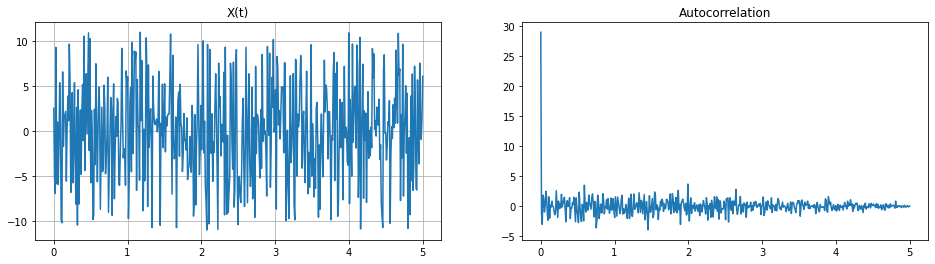

In [28]:
def x_t(t,phi1,phi2):
    return 5*np.sin(2*t+phi1) + 6*np.sin(3*t+phi2)

def autocorrelation(x):
    N=len(x)
    r=np.zeros(N)
    
    for k in range(N):
        for i in range(N):
            if (i-k>=0):
                r[k] += ((x[i]*x[i-k]))/N
    return r


t = np.linspace(0,5,500)
x = [x_t(i,np.random.uniform(-np.pi,np.pi,1),np.random.uniform(0,2*np.pi,1)) for i in t]
r = autocorrelation(x)

fig, axes = plt.subplots(1, 2, figsize=(16, 4))

axes[0].plot(t,x)
axes[0].set_title("X(t)")
axes[0].grid()

axes[1].plot(t,r)
axes[1].set_title("Autocorrelation")

![](im1.jpeg)

![](im2.jpeg)

![](im3.jpeg)

![](im4.jpeg)

7. (a) Draw out a sample for chi-squared distribution with degree of freedom 2 with size 2 × 3

In [39]:
np.random.chisquare(df=2, size=(2,3))

array([[2.00567231, 3.4623353 , 1.9749122 ],
       [3.27041919, 1.80969022, 0.38456987]])

(b) Visualize chi-square distribution with degree of freedom = [1, 4, 8, 12]
for a size of 1000

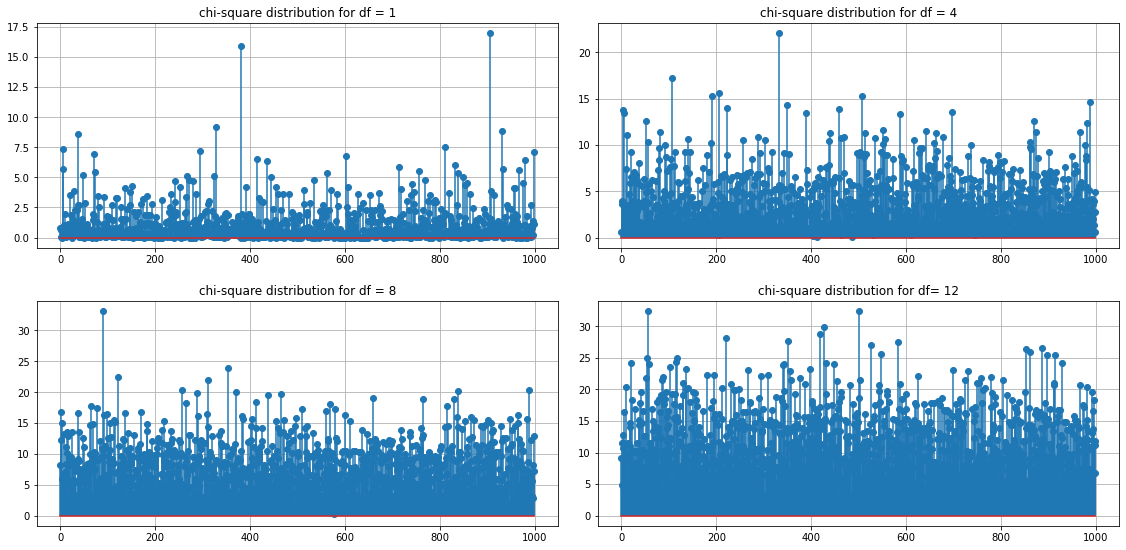

In [22]:
n = [i for i in range(1000)]
cs1 = np.random.chisquare(df=1, size=1000)
cs2 = np.random.chisquare(df=4, size=1000)
cs3 = np.random.chisquare(df=8, size=1000)
cs4 = np.random.chisquare(df=12, size=1000)

fig, axes = plt.subplots(2, 2, figsize=(16, 8))
axes[0][0].stem(n,cs1)
axes[0][0].set_title("chi-square distribution for df = 1")
axes[0][0].grid()

axes[0][1].stem(n,cs2)
axes[0][1].set_title("chi-square distribution for df = 4")
axes[0][1].grid()

axes[1][0].stem(n,cs3)
axes[1][0].set_title("chi-square distribution for df = 8")
axes[1][0].grid()

axes[1][1].stem(n,cs4)
axes[1][1].set_title("chi-square distribution for df= 12")
axes[1][1].grid()
plt.tight_layout(pad=2)

8 (a) Draw out a sample for exponential distribution with 2.0 scale with 2x3 size.


In [37]:
np.random.exponential(scale=2, size=(2,3))

array([[2.08389461, 4.76047146, 0.26699508],
       [0.26922148, 1.36455221, 2.5508955 ]])

8 (b) Visualize exponential distribution for a size of 1000

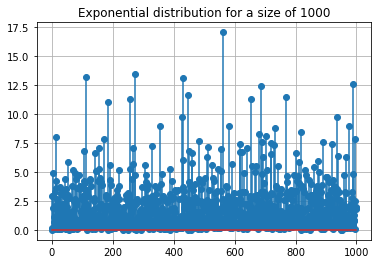

In [28]:
n = [i for i in range(1000)]
x_d = np.random.exponential(scale=2, size=1000)
plt.stem(n,x_d)
plt.title("Exponential distribution for a size of 1000")
plt.grid()

9 (a) Generate a 1-D array containing 100 values, where each value has to be 2, 4, 6 or 8. The probability for the value to be 2, 4, 6, and 8 is set to be 0.1, 0.3, 0.6, 0, respectively.


In [15]:
# P(2)=0.1, P(4)=0.3, P(6)=0.6, P(8)=0
N = 100
p2 = 10 # 0.1*100
p4 = 30 # 0.3*100
p6 = 60 # 0.6*100
p8 = 0
x = [2 for i in range(p2)] + [4 for i in range(p4)] + [6 for i in range(p6)]

(b) For the same example as (a), return a 2-D array with 3 rows, each containing 5 values

In [16]:
import random

arr = np.zeros((3,5))
for i in range(3):
    for j in range(5):
        idx = random.randint(0,99) # random number between 0 and 99
        arr[i][j] = x[idx]
print(arr)

[[4. 4. 6. 6. 6.]
 [2. 4. 4. 6. 2.]
 [6. 6. 6. 6. 4.]]


10. (a) Generate central chi-squared distributed random variables with degrees of freedom k = 1, 2, 3, 4, 5 and plot the PDFs. Write your own function, where the function takes input as degrees of freedom and returns output has chi-sqaured distributed random variable.

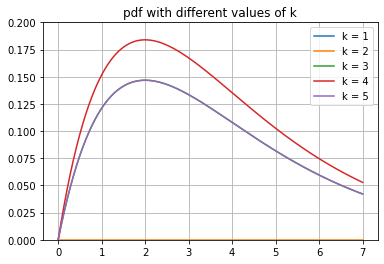

In [29]:
def chi_square(x,k):
        f1 = math.gamma(k/2)
        f2 = 1/(((2)**(k/2))*f1)
        f3 =  ((x)*((k/2)-1))*(np.exp(-(x/2)))*f2
        return f3
k = [1,2,3,4,5]
x = np.linspace(0,7,700)

plt.plot(x,chi_square(x,k = 1),label='k = 1')
plt.plot(x,chi_square(x,k = 2),label='k = 2')
plt.plot(x,chi_square(x,k = 3),label='k = 3')
plt.plot(x,chi_square(x,k = 4),label='k = 4')
plt.plot(x,chi_square(x,k = 5),label='k = 5')
plt.title('pdf with different values of k')
plt.ylim(0,0.2)
plt.legend()
plt.grid()